In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Cargar los datos
data = pd.read_csv(filepath_or_buffer = "/Users/david/diabetes_indiana.csv")

# Separar las variables dependientes e independientes
X = data.iloc[:, :-1].values  # Todas las columnas excepto la última (características)
y = data.iloc[:, -1].values   # La última columna (variable objetivo)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
# Entrenar el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [5]:
# Realizar predicciones
y_pred = model.predict(X_test)


Accuracy Score: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



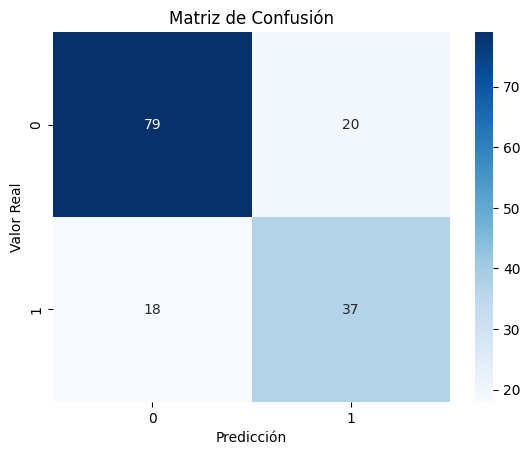

In [6]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Generar un reporte de clasificación
class_report = classification_report(y_test, y_pred)

# Mostrar resultados
print(f"Accuracy Score: {accuracy}")
print("Classification Report:")
print(class_report)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()